### Simulation

In [1]:
# general tools
import numpy as np
import pandas as pd
from numpy import random
import scipy as sp
import newick

# tree/simulation
from prosstt import simulation as sim
from prosstt import tree
from prosstt import count_model as cm
from prosstt import sim_utils as sut

from utils import plot

In [19]:
#newick_string = "((P,C)Q,(F,G)W)D;"
newick_string = "((M,N)A,B)D;"
t = tree.Tree.from_newick(newick_string, genes=5000, modules=25, density=None)
sample_time = np.arange(0, t.get_max_time())

In [20]:
tree1 = newick.loads(newick_string)
print(tree1[0].ascii_art())

        ┌─M
    ┌─A─┤
──D─┤   └─N
    └─B


In [21]:
uMs, Ws, Hs = sim.simulate_lineage(t, a=0.05)
gene_scale = sut.simulate_base_gene_exp(t, uMs)
t.add_genes(uMs, gene_scale)

In [70]:
alpha = np.exp(random.normal(loc=np.log(0.8), scale=np.log(3), size=t.G))
beta = np.exp(random.normal(loc=np.log(1.5), scale=np.log(3), size=t.G)) + 1

X, labs, brns, scalings = sim.sample_whole_tree(t, 50, alpha=alpha, beta=beta)

# normalize gene expression by library size
X_n = (X.transpose() / scalings).transpose()

In [71]:
X_n.shape

(10000, 5000)

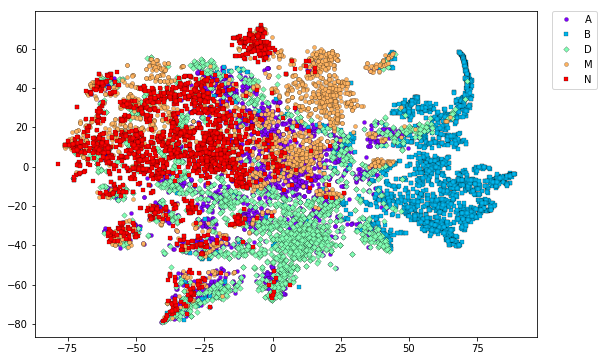

In [72]:
plot(X_n, brns, f="tsne", pca=30)